In [20]:
# Import modules
import json
import os
import cv2
import matplotlib.pyplot as plt

In [21]:
# Set a path
json_data_path = './data/cat_dog_annotation_json.json'

# Load JSON files
with open(json_data_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
print('Types: ', type(json_data))
print(json_data)

Types:  <class 'dict'>
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': 'cat_dog.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [22]:
# Get categories
print(json_data['categories'])
# Result: [{'id': 1, 'name': 'cat', 'supercategory': ''}, 
#          {'id': 2, 'name': 'dog', 'supercategory': ''}]

# Get images
print(json_data['images'])
# Result: [{'id': 1, 'width': 640, 'height': 480, 'file_name': 'cat_dog.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]

# Get annotations
print(json_data['annotations'])
# Result: [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, 
#          {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': 'cat_dog.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


In [23]:
# Define variables
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

print(images_info)
print(categories_info)
print(annotations_info)

# Create a dictionary for label info
label_dict = {1: 'cat', 2: 'dog'}

[{'id': 1, 'width': 640, 'height': 480, 'file_name': 'cat_dog.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


File Name:  cat_dog.png
Image size: 640x480
Image ID:  1
Annotations: 
 {'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}

Coordinations of Bounding Box(X, Y, W, H): 468, 92, 171, 248
2
dog
Annotations: 
 {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}

Coordinations of Bounding Box(X, Y, W, H): 3, 183, 200, 214
1
cat


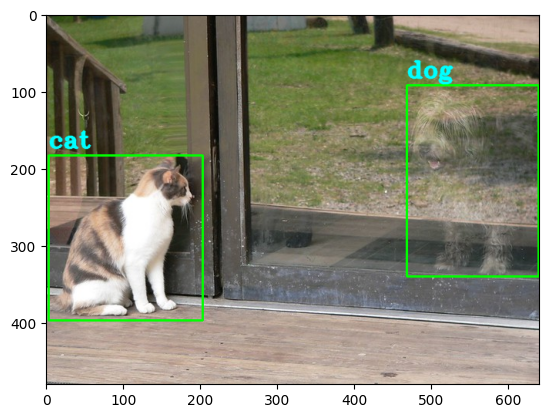

In [24]:
# Get Image information
for image_json in images_info:
    # Get details of images
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_id = image_json['id']
    
    print('File Name: ', file_name)
    print(f'Image size: {image_width}x{image_height}')
    print('Image ID: ', image_id)
    
    # Set an image path
    image_path = os.path.join('./data/', file_name)
    #print(image_path)
    
    # Read images
    image = cv2.imread(image_path)

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get bounding box info from annotations
    for anno_json in annotations_info:
        print('Annotations: \n', anno_json)
        if image_id == anno_json['image_id']:
            bbox = anno_json['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print(f'\nCoordinations of Bounding Box(X, Y, W, H): {x}, {y}, {w}, {h}')
            
            # Draw a rectangle
            cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
            # Display labels
            category_id = anno_json['category_id']
            print(category_id)
            
            # Get label names
            label_name = label_dict[category_id]
            print(label_name)
            
            # Display label names on images
            image = cv2.putText(image,
                               label_name,               # Label text
                               (x, y-10),                # Label position
                               cv2.FONT_HERSHEY_TRIPLEX, # Font
                               1,                        # Font scale
                               (0, 255, 255),            # Text color
                               2,                        # Thickness
                               cv2.LINE_AA)              # Line type -> 'LINE_AA': Anti-aliased
    plt.imshow(image)
    plt.show()
            

In [25]:
# 